<a href="https://colab.research.google.com/github/ziedjouini/projet-Naive-Bayes/blob/main/La_classification_probabiliste_avec_Naive_Bayes_zied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/spam.csv', encoding="latin1" ,header=0)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
"""# cleaning dataset
df=df.drop(df.columns[[2,3,4]], axis=1)
df"""
# Supprimer les colonnes Unnamed: 2,Unnamed: 3,Unnamed: 4
df1=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)

In [ ]:
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Changer les noms des colonnes
nouveaux_noms = {'v1': 'categorie', 'v2': 'message'}
df1.rename(columns=nouveaux_noms, inplace=True)

In [ ]:
df1

,categorie,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df1.categorie.value_counts()

ham     4825
spam     747
Name: categorie, dtype: int64

In [ ]:
df1.describe()

,categorie,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df1.groupby('categorie').describe()

message                                                            \
            count unique                                                top   
categorie                                                                     
ham          4825   4516                             Sorry, I'll call later   
spam          747    653  Please call our customer service representativ...   

                
          freq  
categorie       
ham         30  
spam         4

In [ ]:

#df_animals['animaux_nb'] = df_animals['animaux'].factorize()[0]
df1['spam'] = df1['categorie'].factorize()[0]
df1

,categorie,message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
#create train/test split
X=df1['message']
y=df1['spam']

# Split the data into training and temporary sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.describe()

count                       4179
unique                      3953
top       Sorry, I'll call later
freq                          22
Name: message, dtype: object

il faut utiliser vectorise ((( quetes npl4:: https://odyssey.wildcodeschool.com/quests/1885 )))


L'étape de train-test split doit être réalisé avant l'entrainement du CountVectorizer pour s'assurer qu'il n'y ait pas d'overfitting. Les étapes sont donc les suivantes :

    Train test split
    Fit et transform du Vectorizer sur le train set
    Fit et score du classifier sur le train set
    Transform (sans fit !) du Vectorizer sur le test set
    Predict et score du classifier sur le test set


https://colab.research.google.com/drive/1_mcobEIPIWfWXNENubkqEd5aNsyczyy3?usp=sharing#scrollTo=ZBpCTGomBCtM

In [ ]:
"""#find word count and store as a matrix
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the message
X = vectorizer.fit_transform(df1['message'])

# Convert the sparse matrix to an array (if needed)
X_array = X.toarray()

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()"""

"#find word count and store as a matrix\n# Initialize the CountVectorizer\nvectorizer = CountVectorizer()\n\n# Fit and transform the message\nX = vectorizer.fit_transform(df1['message'])\n\n# Convert the sparse matrix to an array (if needed)\nX_array = X.toarray()\n\n# Get the feature names (words)\nfeature_names = vectorizer.get_feature_names_out()"

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_train_CV = vectorizer.transform(X_train)
X_train_CV

<4179x7441 sparse matrix of type '<class 'numpy.int64'>'
	with 55194 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_CV = vectorizer.transform(X_test)
X_test_CV

<1393x7441 sparse matrix of type '<class 'numpy.int64'>'
	with 17365 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '000pes', ..., 'ûïharry', 'ûò', 'ûówell'],
      dtype=object)

In [ ]:
# Initialize and train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
model=naive_bayes_classifier.fit(X_train_CV, y_train)
model

MultinomialNB()

In [ ]:
# Predict the classes on the test set
y_pred = naive_bayes_classifier.predict(X_test_CV)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print("score d'exactitude (accuracy) sur l'ensemble d'entraînement :",model.score(X_train_CV, y_train))
print("score d'exactitude (accuracy) sur l'ensemble de test :",model.score(X_test_CV, y_test))

score d'exactitude (accuracy) sur l'ensemble d'entraînement : 0.994256999282125
score d'exactitude (accuracy) sur l'ensemble de test : 0.9820531227566404


In [ ]:
# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9820531227566404
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1202
           1       0.98      0.88      0.93       191

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



Pour ham nous avons 0.99 de bon précision et pour spam nous avons 0.93 de bon précision

In [ ]:
confusion_matrix(y_true = y_test, y_pred = model.predict(X_test_CV))

array([[1199,    3],
       [  22,  169]])

In [ ]:
# Confusion matrix:
pd.DataFrame(data= confusion_matrix(y_true=y_test, y_pred=y_pred),index= model.classes_,columns= model.classes_)

,0,1
0,1199,3
1,22,169


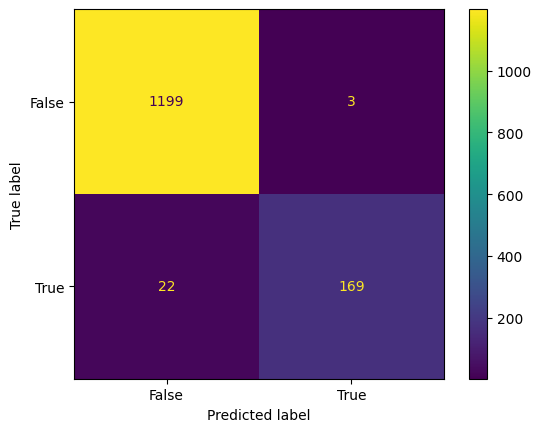

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = model.predict(X_test_CV)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()